# Lab 2
### Part1

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
#import viz libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#import data
# filepath= # put your file path here!
df =pd.read_excel('/content/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
## Verify missing value
df.isnull().sum().sort_values(ascending=False)

,0
CustomerID,135080
Description,1454
InvoiceNo,0
StockCode,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


In [ ]:
## Remove missing values
df_new = df.dropna() # Use the correct DataFrame name 'df'
df_new.shape

(406829, 8)

In [ ]:
# popular items globally
global_popularity=df_new.pivot_table(index=['StockCode','Description'], values='Quantity',
aggfunc='sum').sort_values(by='Quantity', ascending=False)
print('Top 10 popular items globally....')
global_popularity.head(10)

Top 10 popular items globally....


,,Quantity
StockCode,Description,
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
85099B,JUMBO BAG RED RETROSPOT,45066
84879,ASSORTED COLOUR BIRD ORNAMENT,35314
85123A,WHITE HANGING HEART T-LIGHT HOLDER,34147
21212,PACK OF 72 RETROSPOT CAKE CASES,33409
22197,POPCORN HOLDER,30504
23084,RABBIT NIGHT LIGHT,27094
22492,MINI PAINT SET VINTAGE,25880
22616,PACK OF 12 LONDON TISSUES,25321


Text(0, 0.5, 'Item')

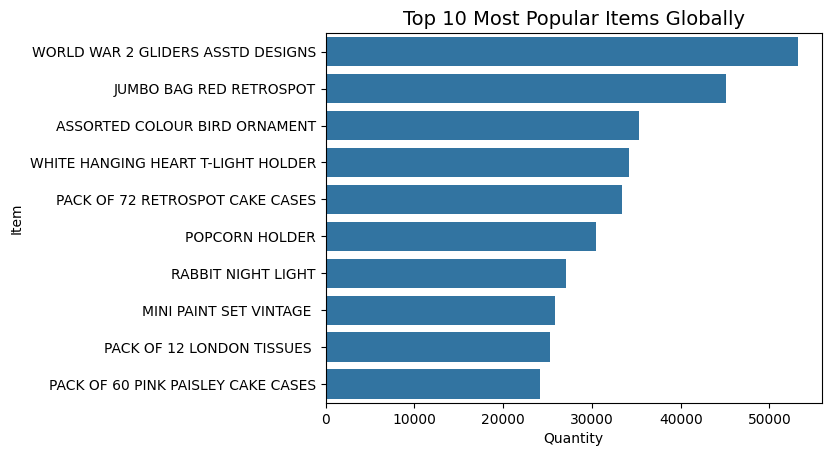

In [ ]:
# vizualize top 10 most popular items
global_popularity.reset_index(inplace=True)
sns.barplot(y='Description', x='Quantity', data=global_popularity.head(10))
plt.title('Top 10 Most Popular Items Globally', fontsize=14)
plt.ylabel('Item')

Text(0, 0.5, 'Item')

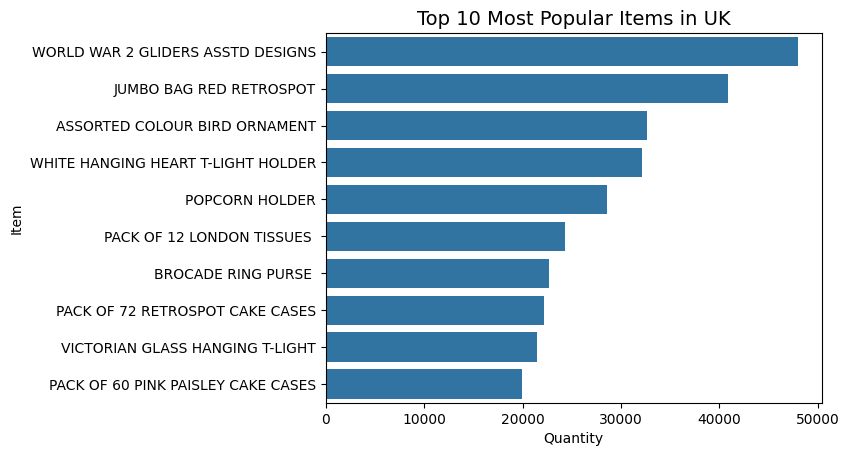

In [ ]:
# popular items by country
countrywise=df_new.pivot_table(index=['Country','StockCode','Description'], values='Quantity',
aggfunc='sum').reset_index()
# vizualize top 10 most popular items in UK
sns.barplot(y='Description', x='Quantity', data=countrywise[countrywise['Country']=='United Kingdom'].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items in UK', fontsize=14)
plt.ylabel('Item')

In [ ]:
# Lets create a function to get buy again output
from collections import Counter
def buy_again(customerid):
 # Fetching the items bought by the customer for provided customer id
 items_bought = df_new[df_new['CustomerID']==customerid].Description
 # Count and sort the repeated purchases
 bought_again = Counter(items_bought)
 # Convert counter to list for printing recommendations
 buy_again_list = list(bought_again)
 # Printing the recommendations
 print('Items you would like to buy again :')
 return(buy_again_list)

In [ ]:
buy_again(17850)

Items you would like to buy again :


['WHITE HANGING HEART T-LIGHT HOLDER',
 'WHITE METAL LANTERN',
 'CREAM CUPID HEARTS COAT HANGER',
 'KNITTED UNION FLAG HOT WATER BOTTLE',
 'RED WOOLLY HOTTIE WHITE HEART.',
 'SET 7 BABUSHKA NESTING BOXES',
 'GLASS STAR FROSTED T-LIGHT HOLDER',
 'HAND WARMER UNION JACK',
 'HAND WARMER RED POLKA DOT',
 'EDWARDIAN PARASOL RED',
 'RETRO COFFEE MUGS ASSORTED',
 'SAVE THE PLANET MUG',
 'VINTAGE BILLBOARD DRINK ME MUG',
 'VINTAGE BILLBOARD LOVE/HATE MUG',
 'WOOD 2 DRAWER CABINET WHITE FINISH',
 'WOOD S/3 CABINET ANT WHITE FINISH',
 'WOODEN PICTURE FRAME WHITE FINISH',
 'WOODEN FRAME ANTIQUE WHITE ',
 'EDWARDIAN PARASOL BLACK',
 'IVORY EMBROIDERED QUILT ',
 'JUMBO SHOPPER VINTAGE RED PAISLEY',
 'HAND WARMER RED RETROSPOT',
 'GIN AND TONIC MUG',
 'COLOUR GLASS. STAR T-LIGHT HOLDER',
 "YOU'RE CONFUSING ME METAL SIGN "]

### Part 2

In [ ]:
import pandas as pd
import numpy as np
#Load the dataset into a pandas dataframe
df = pd.read_csv('/content/movies_metadata.csv')
#Display the first five movies in the dataframe
df.head()

<ipython-input-12-385091cdb7a6>:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
#Calculate the number of votes garnered by the 80th percentile movie
m = df['vote_count'].quantile(0.80)
m

50.0

In [ ]:
#Only consider movies longer than 45 minutes and shorter than 300 minutes
q_movies = df[(df['runtime'] >= 45) & (df['runtime'] <= 300)]
#Only consider movies that have garnered more than m votes
q_movies = q_movies[q_movies['vote_count'] >= m]
#Inspect the number of movies that made the cut
q_movies.shape

(8963, 24)

In [ ]:
# Calculate C
C = df['vote_average'].mean()
C

5.618207215134185

In [ ]:
# Function to compute the IMDB weighted rating for each movie
def weighted_rating(x, m=m, C=C):
 v = x['vote_count']
 R = x['vote_average']
 # Compute the weighted score
 return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
# Compute the score using the weighted_rating function defined above
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [ ]:
#Sort movies in descending order of their scores
q_movies = q_movies.sort_values('score', ascending=False)
#Print the top 25 movies
q_movies[['title', 'vote_count', 'vote_average', 'score', 'runtime']].head(25)

,title,vote_count,vote_average,score,runtime
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.855148,190.0
314,The Shawshank Redemption,8358.0,8.5,8.482863,142.0
834,The Godfather,6024.0,8.5,8.476278,175.0
40251,Your Name.,1030.0,8.5,8.366584,106.0
12481,The Dark Knight,12269.0,8.3,8.289115,152.0
2843,Fight Club,9678.0,8.3,8.286216,139.0
292,Pulp Fiction,8670.0,8.3,8.284623,154.0
522,Schindler's List,4436.0,8.3,8.270109,195.0
23673,Whiplash,4376.0,8.3,8.269704,105.0
5481,Spirited Away,3968.0,8.3,8.266628,125.0


## Part 3

In [ ]:
df =pd.read_csv('/content/Data1.csv',index_col=0)

In [ ]:
df.head()

,Gender,260: Star Wars: Episode IV - A New Hope (1977),1210: Star Wars: Episode VI - Return of the Jedi (1983),356: Forrest Gump (1994),"318: Shawshank Redemption, The (1994)","593: Silence of the Lambs, The (1991)",3578: Gladiator (2000),1: Toy Story (1995),2028: Saving Private Ryan (1998),296: Pulp Fiction (1994),...,2396: Shakespeare in Love (1998),2916: Total Recall (1990),780: Independence Day (ID4) (1996),541: Blade Runner (1982),1265: Groundhog Day (1993),"2571: Matrix, The (1999)",527: Schindler's List (1993),"2762: Sixth Sense, The (1999)",1198: Raiders of the Lost Ark (1981),34: Babe (1995)
User,,,,,,,,,,,,,,,,,,,,,
755,0,1.0,5.0,2.0,NaN,4.0,4.0,2.0,2.0,NaN,...,2.0,NaN,5.0,2.0,NaN,4.0,2.0,5.0,NaN,NaN
5277,0,5.0,3.0,NaN,2.0,4.0,2.0,1.0,NaN,NaN,...,3.0,2.0,2.0,NaN,2.0,NaN,5.0,1.0,3.0,NaN
1577,1,NaN,NaN,NaN,5.0,2.0,NaN,4.0,NaN,NaN,...,NaN,1.0,4.0,4.0,1.0,1.0,2.0,3.0,1.0,3.0
4388,0,NaN,3.0,NaN,NaN,NaN,1.0,2.0,3.0,4.0,...,NaN,4.0,1.0,3.0,5.0,NaN,5.0,1.0,1.0,2.0
1202,1,4.0,3.0,4.0,1.0,4.0,1.0,NaN,4.0,NaN,...,5.0,1.0,NaN,4.0,NaN,3.0,5.0,5.0,NaN,NaN


In [ ]:
df.shape

(20, 21)

In [ ]:
## Verify missing value
df.isnull().sum().sort_values(ascending=False)

,0
541: Blade Runner (1982),11
34: Babe (1995),10
356: Forrest Gump (1994),10
"318: Shawshank Redemption, The (1994)",10
2028: Saving Private Ryan (1998),9
1198: Raiders of the Lost Ark (1981),9
2396: Shakespeare in Love (1998),9
296: Pulp Fiction (1994),9
1259: Stand by Me (1986),9
3578: Gladiator (2000),8


##1

In [ ]:
#select all rows (:) and all columns starting from the second one (1:), effectively ignoring the first column which is the 'Gender'
#.mean() calculates the mean of each column which result in a Series where each value represents the mean of a particular column
#.sort_values() sorts from highest to lowest
mean_ratings = df.iloc[:, 1:].mean().sort_values(ascending=False)
top3_mean_ratings = mean_ratings.head(3)

In [ ]:
print("Top 3 Movies by Mean Rating:")
print(top3_mean_ratings)

Top 3 Movies by Mean Rating:
318: Shawshank Redemption, The (1994)             3.600000
260: Star Wars: Episode IV - A New Hope (1977)    3.266667
541: Blade Runner (1982)                          3.222222
dtype: float64


# 2

In [ ]:
rating_counts = df.iloc[:, 1:].notna().sum().sort_values(ascending=False)  # Ignore the 'Gender' column
top3_rating_counts = rating_counts.head(3)

In [ ]:
print("\nTop 3 Movies by Rating Count (Popularity):")
print(top3_rating_counts)


Top 3 Movies by Rating Count (Popularity):
1: Toy Story (1995)                               17
593: Silence of the Lambs, The (1991)             16
260: Star Wars: Episode IV - A New Hope (1977)    15
dtype: int64


# 3

In [ ]:
ratings_4plus = ((df.iloc[:, 1:] >= 4).sum() / df.iloc[:, 1:].notna().sum()).sort_values(ascending=False)
top3_ratings_4plus = ratings_4plus.head(3)

In [ ]:
print("\nTop 3 Movies by % of Ratings 4+ (Liking):")
print(top3_ratings_4plus)


Top 3 Movies by % of Ratings 4+ (Liking):
318: Shawshank Redemption, The (1994)             0.700000
260: Star Wars: Episode IV - A New Hope (1977)    0.533333
3578: Gladiator (2000)                            0.500000
dtype: float64


#4

In [ ]:
# Filter the DataFrame by 'Gender' without dropping the 'Gender' column initially
males = df[df['Gender'] == 0]
females = df[df['Gender'] == 1]

# Calculate mean ratings for males and females separately by selecting all columns except 'Gender'
male_mean = males.loc[:, males.columns != 'Gender'].mean()
female_mean = females.loc[:, females.columns != 'Gender'].mean()

# Calculate the difference in mean ratings between females and males
diff_fm = female_mean.subtract(male_mean)
max_diff_female = diff_fm.idxmax()  # Movie with the highest difference where females rated higher
print("Movie where females rated higher than males:\n", max_diff_female, round(diff_fm[max_diff_female], 2))

# Calculate the difference in mean ratings between males and females
diff_mf = male_mean.subtract(female_mean)
max_diff_male = diff_mf.idxmax()  # Movie with the highest difference where males rated higher
print("Movie where males rated higher than females:\n", max_diff_male, round(diff_mf[max_diff_male], 2))

# Calculate the overall mean rating difference between females and males
overall_diff = round(female_mean.mean() - male_mean.mean(), 2)
print("Overall female-male rating difference:\n", overall_diff)


Movie where females rated higher than males:
 2396: Shakespeare in Love (1998) 2.11
Movie where males rated higher than females:
 1198: Raiders of the Lost Ark (1981) 1.67
Overall female-male rating difference:
 0.12


#5

In [ ]:
# claculating the percentage for males
male_4_plus = (males >= 4).sum(axis=0) / males.count()
# claculating thepercentage for females
female_4_plus = (females >= 4).sum(axis=0) / females.count()

# the differences in percentage of 4+ ratings
diff_4_plus_female = female_4_plus - male_4_plus
max_diff_4_female = diff_4_plus_female.sort_values(ascending=False).head(1)
print("Movie where females rated 4+ more than males:\n", max_diff_4_female)

diff_4_plus_male = male_4_plus - female_4_plus
max_diff_4_male = diff_4_plus_male.sort_values(ascending=False).head(1)
print("Movie where males rated 4+ more than females:\n", max_diff_4_male)

# the overall percentage differences
print("Overall % 4+ ratings (male):", male_4_plus.mean())
print("Overall % 4+ ratings (female):", female_4_plus.mean())


Movie where females rated 4+ more than males:
 2396: Shakespeare in Love (1998)    0.75
dtype: float64
Movie where males rated 4+ more than females:
 1198: Raiders of the Lost Ark (1981)    0.5
dtype: float64
Overall % 4+ ratings (male): 0.3086545729402872
Overall % 4+ ratings (female): 0.417233560090703


# The End
      .-""""-.
     / -    - \
    |  O    O  |
    |     >    |
     \  \__/  /
      `-.....-`
                /
        /|\\   /
        / | \\/
          |
        / \\
        /   \

